In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей

In [2]:
movies = pd.read_csv('data/movie.csv', engine='python', encoding='utf-8', on_bad_lines='warn')
movies.shape

(40000, 2)

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [3]:
subset_1 = movies.sample(frac=0.001, random_state=50)
subset_1.head()

,text,label
27019,"I got this movie in a bargain bin, hoping for ...",0
13856,The two new OSS 117 movies has a kind of humor...,1
32445,It's amazing what you can do with little money...,1
24754,Director Vincenzo Natali's Cypher is a complex...,1
2666,Wenders was great with Million $ Hotel.I don't...,0


In [4]:
positive_words = ('great', 'really', 'very', 'little', 'more', 'out', 'morgan', 'being')
negative_words = ('just', 'only', 'some', 'like', 'even', 'up', 'predator')

In [5]:
def get_sentiment(row):
    words = nltk.word_tokenize(row['text'].lower())

    num_positive = sum([1 for word in words if word in positive_words])
    num_negative = sum([1 for word in words if word in negative_words])

    if num_positive >= num_negative:
        return 'positive'
    else:
        return 'negative'

In [6]:
subset_1['sentiment'] = subset_1.apply(get_sentiment, axis=1)
subset_1.head()

,text,label,sentiment
27019,"I got this movie in a bargain bin, hoping for ...",0,negative
13856,The two new OSS 117 movies has a kind of humor...,1,positive
32445,It's amazing what you can do with little money...,1,positive
24754,Director Vincenzo Natali's Cypher is a complex...,1,positive
2666,Wenders was great with Million $ Hotel.I don't...,0,negative


Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [42]:
subset_2 = movies.sample(frac=0.001)
subset_2.to_csv('data/subset_2.csv')

In [43]:
subset_2.head()

,text,label
26017,Although I'm not too much of a religious perso...,0
30426,hello there; i would just like to say how much...,1
16397,"/*may contain SPOILERS, but of course it does ...",1
34646,I just can't believe that these games can get ...,1
38488,Red Skelton (in his first starring role) plays...,1


In [31]:
'''
Ввести в терминал: `label-studio`

Создать новый проект, импортировать в него полученый сабсет и вручную разметить данные

Экспортировать данные
''';

In [7]:
labeled_subset_2 = pd.read_csv('data/labeled_subset_2.csv', engine='python', 
    encoding='utf-8', on_bad_lines='warn', index_col=0)
labeled_subset_2.index.name = None

In [8]:
labeled_subset_2.head()

,annotation_id,annotator,created_at,id,label,lead_time,sentiment,text,updated_at
26017,41,1,2024-11-29T15:57:17.354732Z,1,0,10.796,negative,Although I'm not too much of a religious perso...,2024-11-29T15:57:17.354732Z
30426,42,1,2024-11-29T15:57:21.284938Z,2,1,1.526,positive,hello there; i would just like to say how much...,2024-11-29T15:57:21.284938Z
16397,43,1,2024-11-29T15:57:24.534301Z,3,1,1.725,positive,"/*may contain SPOILERS, but of course it does ...",2024-11-29T15:57:24.534301Z
34646,44,1,2024-11-29T15:57:27.711269Z,4,1,1.118,positive,I just can't believe that these games can get ...,2024-11-29T15:57:27.711269Z
38488,45,1,2024-11-29T15:57:30.486298Z,5,1,1.162,positive,Red Skelton (in his first starring role) plays...,2024-11-29T15:57:30.486298Z


Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [9]:
# Подготовим данные к объединению
subset_1 = subset_1.drop(columns=['label'])
labeled_subset_2 = labeled_subset_2.drop(columns=['annotation_id', 'annotator', 'created_at', 'id', 'label', 
                               'lead_time', 'updated_at'])

In [ ]:
# Объединяем имеющиеся датасеты в один
training_subset = pd.concat([subset_1, labeled_subset_2], axis=0)

In [40]:
training_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 27019 to 1473
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       80 non-null     object
 1   sentiment  80 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [41]:
# Переводим данные о настроении из текстового в числовой формат
def num_sentiments(value):
    if value == 'negative':
        return 0
    else:
        return 1

training_subset['sentiment'] = training_subset['sentiment'].apply(num_sentiments)

In [42]:
training_subset

,text,sentiment
27019,"I got this movie in a bargain bin, hoping for ...",0
13856,The two new OSS 117 movies has a kind of humor...,1
32445,It's amazing what you can do with little money...,1
24754,Director Vincenzo Natali's Cypher is a complex...,1
2666,Wenders was great with Million $ Hotel.I don't...,0
...,...,...
32216,"Absolutely the most thoughtful, spiritually de...",1
35888,Two little girls strike a friendship. One trie...,0
7950,Anyone who complains about Peter Jackson makin...,0
34247,The film listed here as having been made in 19...,0


Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [43]:
# Выбрасываем размеченные данные из основного массива
testing_subset = movies.drop(index=training_subset.index)
testing_subset.shape

(39921, 2)

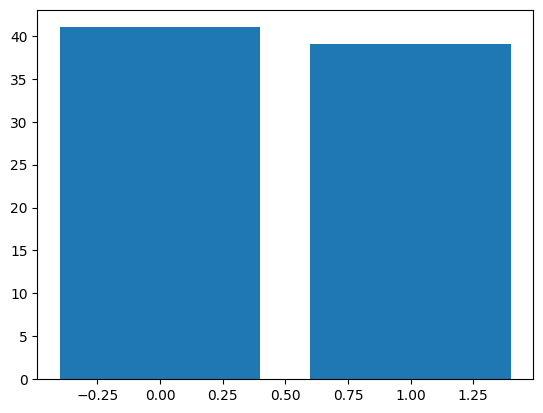

In [44]:
training_subset_values = training_subset['sentiment'].value_counts()
plt.bar(training_subset_values.index, training_subset_values.values);

In [47]:
def train_model(data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(data['text'])
    y = data['sentiment']

    model = LogisticRegression()
    model.fit(x, y)
    return model, vect

model, vect = train_model(training_subset)
model

LogisticRegression()

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [48]:
x_test = vect.transform(testing_subset['text'])
y_test = testing_subset['label']

y_preds = model.predict(x_test)

In [50]:
f1 = f1_score(y_test, y_preds)
f1

0.5729565520078479

Вывод: низкие показатели эффективности модели машинного обучения обусловлены малой выборкой обучающего датасета. При увеличении обучающей выборки будет расти и эффективность модели